# Context : Data Stream, the Computational Complexity project

In this project we want to respond to a simple problematic : 

*   write an algorithm that give the **100 maximum numbers** of a very large stream of number (> 100&nbsp;000)
*   with the **smallest memory cost** possible (<1 KiB)
*   with the **lowest algorithmic complexity** possible

Another constraint : **No external libraries** (but you can recode any algorithm you want )

---

**This deliverable** is a Jupyter Notebook composed of several parts :
 - Presentation and codes of your algorithm(s)
 - Check : result validity
 - Check : memory complexity curves
 - Challenge : time complexity curves 

# Presentation of your algorithm(s) and their codes




## Algorithm #1 (simple)



### Idea developped

*Please evoque HERE what you tried to do*

### Code

In [1]:
#This function read the file AS A STREAM seek the maximum value on the go => TO BE CHANGED BY YOU
def filterMaxByLineSimple(filename):
  with open(filename,"r") as f: # Opening the file in reading mode
    if f.mode == 'r': # If opening went well and the file is readable
      #Initialisation of max search
      first=True
      max_value=0

      line = f.readline() # Loading the first line
      while line: # While there is new line to be read
        value = int(line) # String to int conversion
        if first or max_value < value: # Seeking maximum value
          max_value=value
          first=False
        line = f.readline() # Loading the next line
    return([max_value]) # Printing the maximum value

## Algorithm #2 (optimised ? optional !)



### Idea developped

*Please evoque HERE what you tried to do*

### Code

In [2]:
#This function read the file AS A STREAM seek the maximum value on the go => TO BE CHANGED BY YOU
def filterMaxByLineOptimized(filename):
  with open(filename,"r") as f: # Opening the file in reading mode
    if f.mode == 'r': # If opening went well and the file is readable
      #Initialisation of max search
      first=True
      max_value=0

      line = f.readline() # Loading the first line
      while line: # While there is new line to be read
        value = int(line) # String to int conversion
        if first or max_value < value: # Seeking maximum value
          max_value=value
          first=False
        line = f.readline() # Loading the next line
    return([max_value]) # Printing the maximum value

# Prerequisite to the profiling

In [ ]:
%pip install pprofile
%pip install memory_profiler

### Generate the data files online :

In [3]:
import sys
import numpy as np

filelist={"A_dixmille.txt":10000,"B_centmille.txt":100000,"C_cinqcentmille.txt":500000,"D_unmillion.txt":1000000}

np.random.seed(42) # Common seed for comparison between every participants

for filename, dataSize in filelist.items():
    f= open(filename,"w")
    for i in range(0,dataSize):
	    f.write("%d\n" % np.random.randint(-sys.maxsize-1,sys.maxsize,dtype=np.int64))
    f.close

In [4]:
# prints all files
print(os.listdir("./"))

['A_dixmille.txt', 'B_centmille.txt', 'Computation_Complexity_Project _ Data Stream Template_P2023.ipynb', 'C_cinqcentmille.txt', 'D_unmillion.txt']


#Check : Result validity

Getting the verification data by cheating

In [5]:
def cheaterFunction(filename):
  with open(filename,"r") as f: # Opening the file in reading mode
    if f.mode == 'r': # If opening went well and the file is readable
      array = sorted(map(int, f.readlines()), reverse=True) # Loading the whole file, convert it to integers and sort it
      return array[0:100]

resultCheck={}
for filename,dataSize in filelist.items():
  resultCheck[filename] = cheaterFunction(filename)

Actual verification of your code

In [6]:
for filename,dataSize in filelist.items():
  resultSimple = filterMaxByLineSimple(filename)
  resultSimple.sort(reverse=True)
  if (resultCheck[filename] != resultSimple):
    print("Invalid result for the simple algorithm with", filename, "!")
    print("Extrait du resultat attendu : ",resultCheck[filename])
    print("Extrait du resultat obtenu : ",resultSimple)
    break
  else:
    print("Simple algorithm with", filename, ": OK")



Invalid result for the simple algorithm with A_dixmille.txt !
Extrait du resultat attendu :  [9218164057221768836, 9215213003168247820, 9214244366717535232, 9213423375774400266, 9212557178657718975, 9211387191772904760, 9208749350247183368, 9203167335121995510, 9202944295805462155, 9201105554526615788, 9197865998701422430, 9196823575822220692, 9194248905597728218, 9192888947708935992, 9185263127085556525, 9183173969914486129, 9181855646477773762, 9180432824133008253, 9179621835531115354, 9175833658351626745, 9172420265158078642, 9171395648061878492, 9170328421710815747, 9167856621563748463, 9167098661243788908, 9165712256317060455, 9165251603509085049, 9162439740536444455, 9162189300439753220, 9161332530971228930, 9159293826587048597, 9155752501778924217, 9155744785516978487, 9153726273259742722, 9152493564527218764, 9149820759897706555, 9145939430147040649, 9144686478687518680, 9143039683694185376, 9142780250213340820, 9142283857264691444, 9141632568157629971, 9140665028097778965, 914

In [7]:
for filename,dataSize in filelist.items():
  resultOptimized = filterMaxByLineOptimized(filename)
  resultOptimized.sort(reverse=True)
  if (resultCheck[filename] != resultOptimized):
    print("Invalid result for the optimized algorithm with", filename, "!")
    print("Extrait du resultat attendu : ",resultCheck[filename])
    print("Extrait du resultat obtenu : ",resultOptimized)
    break
  else:
    print("Optimized algorithm with", filename, ": OK")


Invalid result for the optimized algorithm with A_dixmille.txt !
Extrait du resultat attendu :  [9218164057221768836, 9215213003168247820, 9214244366717535232, 9213423375774400266, 9212557178657718975, 9211387191772904760, 9208749350247183368, 9203167335121995510, 9202944295805462155, 9201105554526615788, 9197865998701422430, 9196823575822220692, 9194248905597728218, 9192888947708935992, 9185263127085556525, 9183173969914486129, 9181855646477773762, 9180432824133008253, 9179621835531115354, 9175833658351626745, 9172420265158078642, 9171395648061878492, 9170328421710815747, 9167856621563748463, 9167098661243788908, 9165712256317060455, 9165251603509085049, 9162439740536444455, 9162189300439753220, 9161332530971228930, 9159293826587048597, 9155752501778924217, 9155744785516978487, 9153726273259742722, 9152493564527218764, 9149820759897706555, 9145939430147040649, 9144686478687518680, 9143039683694185376, 9142780250213340820, 9142283857264691444, 9141632568157629971, 9140665028097778965, 

# Check : Memory complexity curves

In [8]:
from memory_profiler import memory_usage #Import the library

sizeList=[]
mcostListSimple=[]
mcostListOptimized=[]
mcostListThreshold=[]

# We will iterate on each file to find the complexity curve
for filename,dataSize in filelist.items():
  sizeList.append(dataSize)
  mem_during_execution = memory_usage((filterMaxByLineSimple,(filename,))) #memory_usage take the function name and its paramater(s). It return an array of memory size during execution
  memory_increment = max(mem_during_execution)-min(mem_during_execution) #The memory used by the function
  mcostListSimple.append(memory_increment)
  mem_during_execution = memory_usage((filterMaxByLineOptimized,(filename,))) #memory_usage take the function name and its paramater(s). It return an array of memory size during execution
  memory_increment = max(mem_during_execution)-min(mem_during_execution) #The memory used by the function
  mcostListOptimized.append(memory_increment)
  mcostListThreshold.append(0.001)

print(sizeList)
print(mcostListSimple)
print(mcostListOptimized)





[10000, 100000, 500000, 1000000]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.00390625, 0.0]


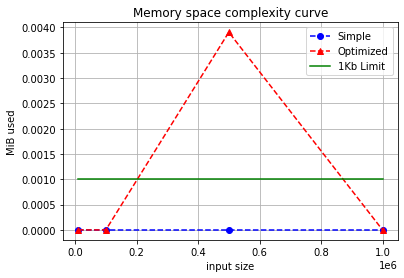

In [9]:
#Let's plot things !
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
#sizeList and costList from above

fig, ax = plt.subplots()
ax.plot(sizeList, mcostListSimple,'--bo', label="Simple")
ax.plot(sizeList, mcostListOptimized,'--r^', label="Optimized")
ax.plot(sizeList, mcostListThreshold,'-g', label="1Kb Limit")

ax.set(xlabel='input size', ylabel='MiB used',
       title='Memory space complexity curve')
ax.grid()
ax.legend()
plt.show()

**Your curve should stay below the limit**

# Challenge : time complexity curves 

In [ ]:
import pprofile
import pstats
import numpy as np

sizeList=[]
tcostListSimple=[]
tcostListOptimized=[]
tcostListCorrectThreshold=[]
tcostListGoodThreshold=[]

# We will iterate on each file to find the complexity curve
for filename,dataSize in filelist.items():
  sizeList.append(dataSize)

  prof = pprofile.Profile()
  prof.runcall(filterMaxByLineSimple, filename)
  timingFile = list(prof.file_dict.values())[0][0]
  tcostListSimple.append(timingFile.getTotalHitCount())

  prof = pprofile.Profile()
  prof.runcall(filterMaxByLineOptimized, filename)
  timingFile = list(prof.file_dict.values())[0][0]
  tcostListOptimized.append(timingFile.getTotalHitCount())

  tcostListCorrectThreshold.append(7.1*dataSize)
  tcostListGoodThreshold.append(5.1*dataSize)

print(sizeList)
print(tcostListSimple)
print(tcostListOptimized)

In [ ]:
#Let's plot things !
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
#sizeList and costList from above

fig, ax = plt.subplots()
ax.plot(sizeList, tcostListGoodThreshold,'-', color='xkcd:light green', label="A 'good' code threshold")
ax.plot(sizeList, tcostListCorrectThreshold,'-', color='xkcd:peach', label="Minimum threshold")
ax.plot(sizeList, tcostListSimple,'--bo', label="Simple")
ax.plot(sizeList, tcostListOptimized,'--r^', label="Optimized")

ax.set(xlabel='input size', ylabel='# of operations',
       title='Execution time complexity curve')
ax.grid()
ax.legend()
plt.show()

**Your code should not be above the orange curve and the closest possible to the green one (or below ?)**

(Obviously, you need to pass the two previous tests also. Not doing the task will always be quicker :-) )

# Bonus : What is the best/worst cases of your algorithms

Explain HERE what are the best/worst cases of your algorithms